





### **Dataset Used:**

This Consist the images of the flowers like daisy, Dandelion, Rose, Sunflower, Tulip. We have the dataset of total 4326 images.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
print(os.listdir("C:\\Users\\Sid\\Desktop\\4th year\\ML\\Lab\\Flowers\\flowers"))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


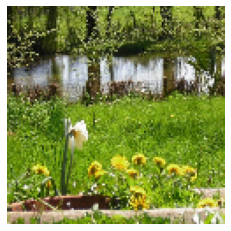

In [ ]:
img = plt.imread("C:\\Users\\sid\\Desktop\\4th year\\ML\\Lab\\Flowers\\flowers\\dandelion\\9818247_e2eac18894.jpg")
img = cv2.resize(img,(124,124))
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
x_ = list()
y = list()
IMG_SIZE = 128
for i in os.listdir("C:\\Users\\sid\\Desktop\\4th year\\ML\\Lab\\Flowers\\flowers\\daisy"):
    try:
        path = "C:\\Users\\sid\\Desktop\\4th year\\ML\\Lab\\Flowers\\flowers\\daisy\\"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(0)
    except:
        None
for i in os.listdir("C:\\Users\\sid\\Desktop\\4th year\\ML\\Lab\\Flowers\\flowers\\dandelion"):
    try:
        path = "C:\\Users\\sid\\Desktop\\4th year\\ML\\Lab\\Flowers\\flowers\\dandelion\\"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(1)
    except:
        None
for i in os.listdir("C:\\Users\\sid\\Desktop\\4th year\\ML\\Lab\\Flowers\\flowers\\rose"):
    try:
        path = "C:\\Users\\sid\\Desktop\\4th year\\ML\\Lab\\Flowers\\flowers\\rose\\"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(2)
    except:
        None
for i in os.listdir("C:\\Users\\sid\\Desktop\\4th year\\ML\\Lab\\Flowers\\flowers\\sunflower"):
    try:
        path = "C:\\Users\\sid\\Desktop\\4th year\\ML\\Lab\\Flowers\\flowers\\sunflower\\"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(3)
    except:
        None
for i in os.listdir("C:\\Users\\sid\\Desktop\\4th year\\ML\\Lab\\Flowers\\flowers\\tulip"):
    try:
        path = "C:\\Users\\sid\\Desktop\\4th year\\ML\\Lab\\Flowers\\flowers\\tulip\\"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(4)
    except:
        None
x_ = np.array(x_)

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,5)
X=np.array(x_)
X=X/255

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation = "softmax"))
model.add(Dense(5, activation = "softmax"))

In [ ]:
batch_size=32
epochs=20

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False, 
        zca_whitening=False,
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True, 
        vertical_flip=False)  

datagen.fit(x_train)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [ ]:
History1 = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 82 steps, validate on 885 samples
Epoch 1/20
82/82 [==============================] - 13s 156ms/step - loss: 1.5265 - accuracy: 0.4748 - val_loss: 1.5486 - val_accuracy: 0.2960
Epoch 2/20
82/82 [==============================] - 9s 110ms/step - loss: 1.4230 - accuracy: 0.5446 - val_loss: 1.5036 - val_accuracy: 0.3356
Epoch 3/20
82/82 [==============================] - 9s 111ms/step - loss: 1.3515 - accuracy: 0.5793 - val_loss: 1.4438 - val_accuracy: 0.3774
Epoch 4/20
82/82 [==============================] - 9s 113ms/step - loss: 1.2997 - accuracy: 0.5706 - val_loss: 1.4265 - val_accuracy: 0.3763
Epoch 5/20
82/82 [==============================] - 10s 117ms/step - loss: 1.2460 - accuracy: 0.5888 - val_loss: 1.2940 - val_accuracy: 0.5073
Epoch 6/20
82/82 [==============================] - 9s 116ms/step - loss: 1.2043 - accuracy: 0.5950 - val_loss: 1.2316 - val_accuracy: 0.5153
E

In [ ]:
model.evaluate(x_train,y_train)

2654/2654 [==============================] - 2s 731us/sample - loss: 1.3156 - accuracy: 0.4819


[1.3155514439336322, 0.4819141]

In [ ]:
model.evaluate(x_test,y_test)

885/885 [==============================] - 1s 612us/sample - loss: 1.3067 - accuracy: 0.4836


[1.3067477821630273, 0.48361582]

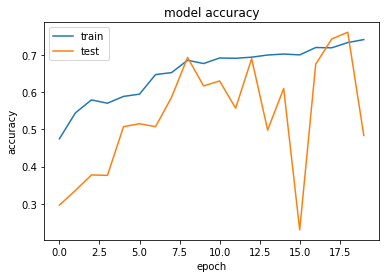

In [ ]:
plt.plot(History1.history['accuracy'])
plt.plot(History1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

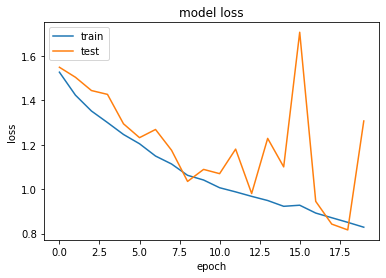

In [ ]:
plt.plot(History1.history['loss'])
plt.plot(History1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
History2 = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

  ...
    to  
  ['...']
Train for 82 steps, validate on 885 samples
Epoch 1/20
82/82 [==============================] - 13s 155ms/step - loss: 0.8350 - accuracy: 0.7311 - val_loss: 0.9400 - val_accuracy: 0.6757
Epoch 2/20
82/82 [==============================] - 10s 127ms/step - loss: 0.8050 - accuracy: 0.7487 - val_loss: 1.0021 - val_accuracy: 0.6249
Epoch 3/20
82/82 [==============================] - 11s 132ms/step - loss: 0.7940 - accuracy: 0.7479 - val_loss: 0.8211 - val_accuracy: 0.7277
Epoch 4/20
82/82 [==============================] - 11s 129ms/step - loss: 0.7791 - accuracy: 0.7567 - val_loss: 0.8114 - val_accuracy: 0.7480
Epoch 5/20
82/82 [==============================] - 11s 135ms/step - loss: 0.7593 - accuracy: 0.7632 - val_loss: 0.8913 - val_accuracy: 0.6960
Epoch 6/20
82/82 [==============================] - 11s 137ms/step - loss: 0.7746 - accuracy: 0.7506 - val_loss: 0.8896 - val_accuracy: 0.6768
Epoch 7/20
82/82 [==============================] - 12s 144ms/step - loss

In [ ]:
model.evaluate(x_train,y_train)

2654/2654 [==============================] - 2s 625us/sample - loss: 0.6514 - accuracy: 0.7905


[0.6513688849073294, 0.7905049]

In [ ]:
model.evaluate(x_test,y_test)

885/885 [==============================] - 1s 619us/sample - loss: 0.6952 - accuracy: 0.7842


[0.6951981360629453, 0.7841808]

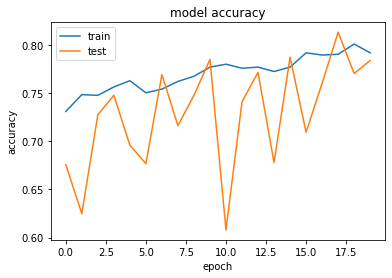

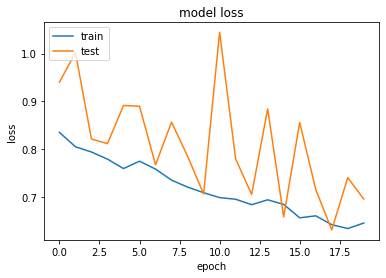

In [ ]:
plt.plot(History2.history['accuracy'])
plt.plot(History2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(History2.history['loss'])
plt.plot(History2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
History3 = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

  ...
    to  
  ['...']
Train for 82 steps, validate on 885 samples
Epoch 1/20
82/82 [==============================] - 13s 163ms/step - loss: 0.6850 - accuracy: 0.7681 - val_loss: 0.6813 - val_accuracy: 0.7808
Epoch 2/20
82/82 [==============================] - 12s 144ms/step - loss: 0.6536 - accuracy: 0.7803 - val_loss: 0.6747 - val_accuracy: 0.7684
Epoch 3/20
82/82 [==============================] - 12s 144ms/step - loss: 0.6329 - accuracy: 0.7902 - val_loss: 0.7885 - val_accuracy: 0.7412
Epoch 4/20
82/82 [==============================] - 12s 143ms/step - loss: 0.6246 - accuracy: 0.7963 - val_loss: 0.6239 - val_accuracy: 0.8023
Epoch 5/20
82/82 [==============================] - 12s 146ms/step - loss: 0.5990 - accuracy: 0.8158 - val_loss: 0.6292 - val_accuracy: 0.8023
Epoch 6/20
82/82 [==============================] - 12s 145ms/step - loss: 0.5985 - accuracy: 0.8120 - val_loss: 0.7727 - val_accuracy: 0.7559
Epoch 7/20
82/82 [==============================] - 11s 138ms/step - loss

In [ ]:
model.evaluate(x_train,y_train)

2654/2654 [==============================] - 2s 612us/sample - loss: 0.5070 - accuracy: 0.8395


[0.5069801830760321, 0.83948755]

In [ ]:
model.evaluate(x_test,y_test)

885/885 [==============================] - 1s 609us/sample - loss: 0.5600 - accuracy: 0.8282


[0.5599657722785648, 0.82824856]

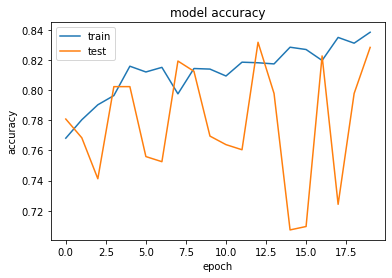

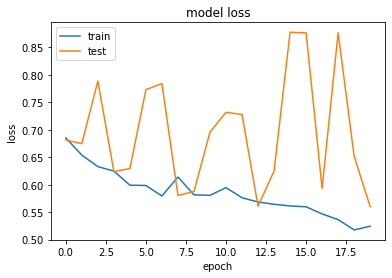

In [ ]:
plt.plot(History3.history['accuracy'])
plt.plot(History3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

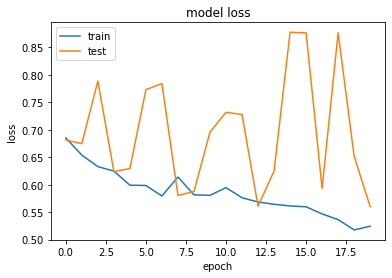

In [ ]:
plt.plot(History3.history['loss'])
plt.plot(History3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.compile(optimizer='adagrad',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
History4 = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

  ...
    to  
  ['...']
Train for 82 steps, validate on 885 samples
Epoch 1/20
82/82 [==============================] - 11s 129ms/step - loss: 0.5437 - accuracy: 0.8318 - val_loss: 0.5449 - val_accuracy: 0.8305
Epoch 2/20
82/82 [==============================] - 11s 131ms/step - loss: 0.5207 - accuracy: 0.8375 - val_loss: 0.5639 - val_accuracy: 0.8294
Epoch 3/20
82/82 [==============================] - 10s 125ms/step - loss: 0.4857 - accuracy: 0.8539 - val_loss: 0.5909 - val_accuracy: 0.8192
Epoch 4/20
82/82 [==============================] - 11s 132ms/step - loss: 0.5204 - accuracy: 0.8352 - val_loss: 0.5974 - val_accuracy: 0.8079
Epoch 5/20
82/82 [==============================] - 11s 129ms/step - loss: 0.4988 - accuracy: 0.8471 - val_loss: 0.5928 - val_accuracy: 0.8124
Epoch 6/20
82/82 [==============================] - 12s 142ms/step - loss: 0.5034 - accuracy: 0.8432 - val_loss: 0.6284 - val_accuracy: 0.7989
Epoch 7/20
82/82 [==============================] - 11s 138ms/step - loss

In [ ]:
model.evaluate(x_train,y_train)

2654/2654 [==============================] - 2s 617us/sample - loss: 0.4941 - accuracy: 0.8440


[0.49411033829442524, 0.84400904]

In [ ]:
model.evaluate(x_test,y_test)

885/885 [==============================] - 1s 625us/sample - loss: 0.5753 - accuracy: 0.8158


[0.575273122558486, 0.8158192]

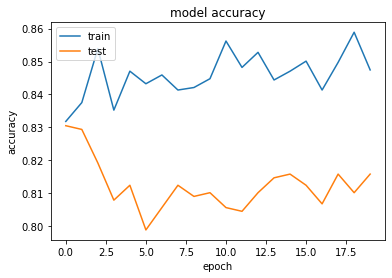

In [ ]:
plt.plot(History4.history['accuracy'])
plt.plot(History4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

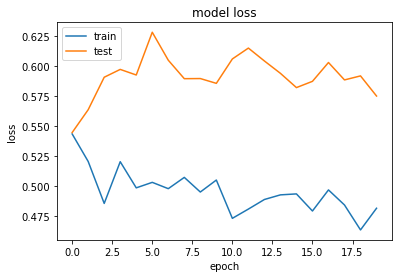

In [ ]:
plt.plot(History4.history['loss'])
plt.plot(History4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
History5 = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

  ...
    to  
  ['...']
Train for 82 steps, validate on 885 samples
Epoch 1/20
82/82 [==============================] - 13s 162ms/step - loss: 0.5195 - accuracy: 0.8406 - val_loss: 0.9376 - val_accuracy: 0.6904
Epoch 2/20
82/82 [==============================] - 11s 140ms/step - loss: 0.5253 - accuracy: 0.8352 - val_loss: 1.1618 - val_accuracy: 0.6260
Epoch 3/20
82/82 [==============================] - 12s 146ms/step - loss: 0.5104 - accuracy: 0.8368 - val_loss: 2.0049 - val_accuracy: 0.3763
Epoch 4/20
82/82 [==============================] - 11s 138ms/step - loss: 0.5174 - accuracy: 0.8310 - val_loss: 0.5616 - val_accuracy: 0.8260
Epoch 5/20
82/82 [==============================] - 11s 137ms/step - loss: 0.5143 - accuracy: 0.8345 - val_loss: 0.7161 - val_accuracy: 0.7661
Epoch 6/20
82/82 [==============================] - 12s 140ms/step - loss: 0.4871 - accuracy: 0.8463 - val_loss: 0.7965 - val_accuracy: 0.7356
Epoch 7/20
82/82 [==============================] - 12s 142ms/step - loss

In [ ]:
model.evaluate(x_train,y_train)

2654/2654 [==============================] - 2s 612us/sample - loss: 0.7411 - accuracy: 0.7517


[0.7411478893956297, 0.7516956]

In [ ]:
model.evaluate(x_test,y_test)

885/885 [==============================] - 1s 631us/sample - loss: 0.8303 - accuracy: 0.7322


[0.8303418087420491, 0.73220336]

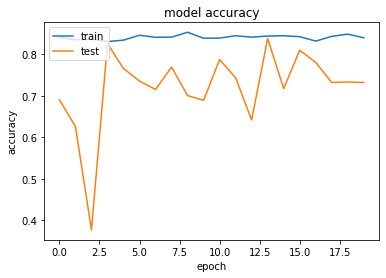

In [ ]:
plt.plot(History5.history['accuracy'])
plt.plot(History5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

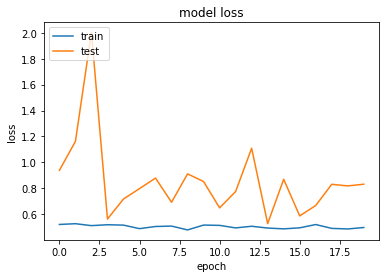

In [ ]:
plt.plot(History5.history['loss'])
plt.plot(History5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Analysis:** 

We observe that the model which uses NADAM reaches the lowest loss and highest accuracy with
the dataset.

### **Conclusion:**

Hence we conclude that we actually learn how different optimizers work and perform while
training and how to do different hyperparameter tuning and found out the best optimizers.